In [3]:
import numpy as np
from PIL import Image
from torchvision import transforms

# 이미지 전처리 함수
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def preprocess_image(img_path):
    image = Image.open(img_path).convert("RGB")
    return transform(image).unsqueeze(0)  # (1, 3, 224, 224)


In [ ]:
import torch
import torchvision.models as models
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

# CNN 모델 (ResNet50) 로드
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # 마지막 FC 레이어 제거
resnet.eval()

# CNN 특징 추출
def extract_cnn_features(img_path):
    img_tensor = preprocess_image(img_path)
    with torch.no_grad():
        features = resnet(img_tensor).flatten().numpy()  # (2048,)
    return features

# 코사인 유사도 계산
def calculate_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

# CNN 유사도 계산 예제
cnn_feat1 = extract_cnn_features("./ex_data/image_1.jpeg")
cnn_feat2 = extract_cnn_features("./ex_data/c--88-_jpeg_jpg.rf.e1904e5f6ec8799cbb585551aafbaab1.jpg")

cnn_similarity = calculate_cosine_similarity(cnn_feat1, cnn_feat2)
print(f"✅ CNN 기반 유사도: {cnn_similarity:.4f}")

# 4. 유사도 계산 (코사인, 유클리드, 맨해튼)
cos_sim = cosine_similarity([cnn_feat1], [cnn_feat2])[0][0]
euclidean_dist = distance.euclidean(cnn_feat1, cnn_feat2)
manhattan_dist = distance.cityblock(cnn_feat1, cnn_feat2)

# 5. 결과 출력
print(f"✅ 코사인 유사도(Cosine Similarity): {cos_sim:.4f}")
print(f"✅ 유클리드 거리(Euclidean Distance): {euclidean_dist:.4f}")
print(f"✅ 맨해튼 거리(Manhattan Distance): {manhattan_dist:.4f}")

c:\Users\LG\elice\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\LG\elice\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ CNN 기반 유사도: 0.6047
✅ 코사인 유사도(Cosine Similarity): 0.6047
✅ 유클리드 거리(Euclidean Distance): 22.6938
✅ 맨해튼 거리(Manhattan Distance): 682.8010


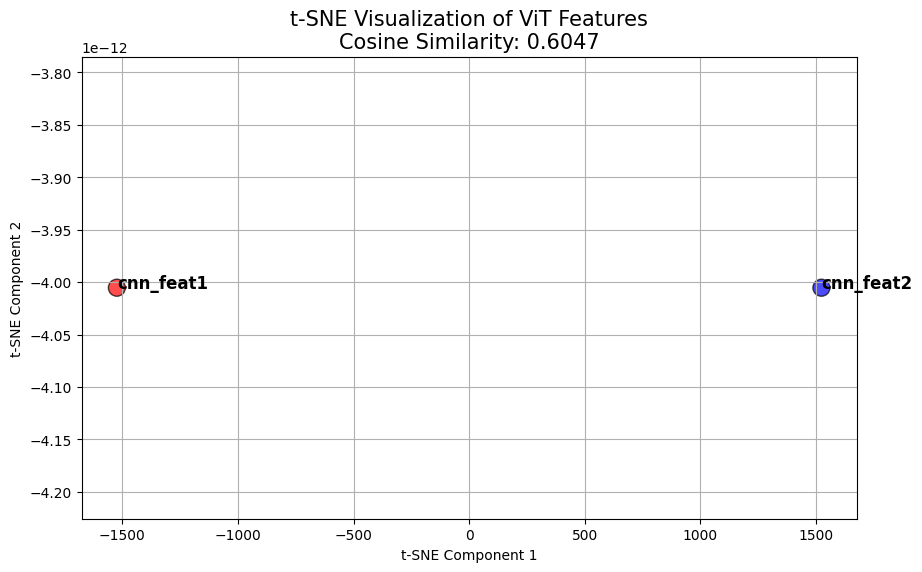

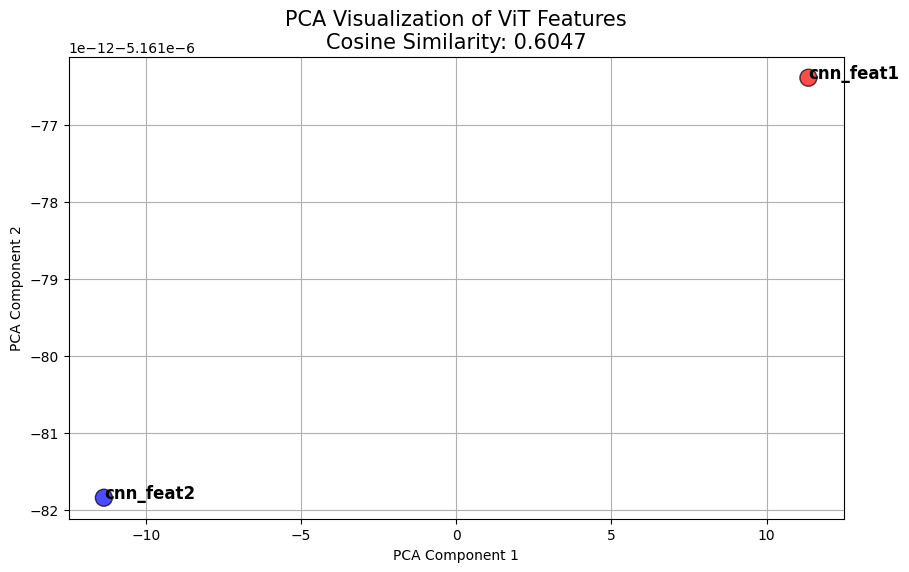

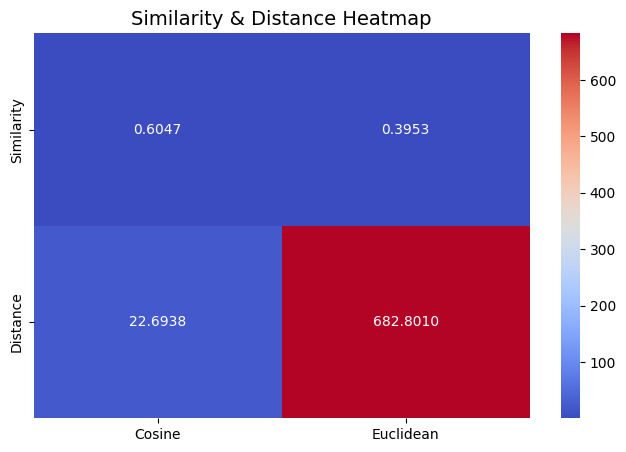

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 5. 📊 t-SNE 시각화
# ===================================
features = np.array([cnn_feat1, cnn_feat2])
tsne = TSNE(n_components=2, random_state=42, perplexity=1)
features_2d = tsne.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=['red', 'blue'], s=150, alpha=0.7, edgecolors='k')
for i, txt in enumerate(['cnn_feat1', 'cnn_feat2']):
    plt.annotate(txt, (features_2d[i, 0], features_2d[i, 1]), fontsize=12, fontweight='bold')
plt.title(f"t-SNE Visualization of ViT Features\nCosine Similarity: {cos_sim:.4f}", fontsize=15)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# ===================================
# 6. 📊 PCA 시각화
# ===================================
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=['red', 'blue'], s=150, alpha=0.7, edgecolors='k')
for i, txt in enumerate(['cnn_feat1', 'cnn_feat2']):
    plt.annotate(txt, (features_pca[i, 0], features_pca[i, 1]), fontsize=12, fontweight='bold')
plt.title(f"PCA Visualization of ViT Features\nCosine Similarity: {cos_sim:.4f}", fontsize=15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# ===================================
# 7. 🔥 유사도 히트맵 (Cosine, Euclidean, Manhattan)
# ===================================
similarity_matrix = np.array([
    [cos_sim, 1 - cos_sim],
    [euclidean_dist, manhattan_dist]
])

plt.figure(figsize=(8, 5))
sns.heatmap(similarity_matrix, annot=True, fmt='.4f', cmap='coolwarm',
            xticklabels=['Cosine', 'Euclidean'], yticklabels=['Similarity', 'Distance'])
plt.title("Similarity & Distance Heatmap", fontsize=14)
plt.show()